In [ ]:
# @title # Applied Regression Methods (MACT 4231) - Data Analysis Project

In [ ]:
# @title # Nour Kahky 900221042 & Omar Moustafa 900222400

In [ ]:
# @title # Installing & Loading the Necessary Packages:

In [2]:
if(!require("DescTools")) install.packages("DescTools")
if(!require("ggplot2")) install.packages("ggplot2")
if(!require("olsrr")) install.packages("olsrr")
if(!require("MASS")) install.packages("MASS")
if(!require("stats")) install.packages("stats")
if(!require("lmtest")) install.packages("lmtest")
if(!require("e1071")) install.packages("e1071")

# install.packages("DescTools")
# install.packages("ggplot2")
# install.packages("olsrr")
# install.packages("MASS")
# install.packages("stats")
# install.packages("lmtest")
# install.packages("e1071")

Loading required package: DescTools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DescTools’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: olsrr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘olsrr’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘goftest’, ‘gridExtra’, ‘nortest’, ‘xplorerr’


Loading required package: MASS

Loading required package: lmtest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there i

In [3]:
library(DescTools)
library(ggplot2)
library(olsrr)
library(MASS)
library(stats)
library(lmtest)
library(e1071)


Attaching package: ‘olsrr’


The following object is masked from ‘package:MASS’:

    cement


The following object is masked from ‘package:datasets’:

    rivers


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
# @title # Loading & Viewing the Dataset:


In [4]:
# Load the data set

df = read.csv("StudentPerformanceFactors.csv", header = TRUE)

In [5]:
# Display the first 5 rows of the dataset

head(df, 5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
2,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
3,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
4,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
5,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Display the internal structure of the dataset

str(df)

'data.frame':	6607 obs. of  20 variables:
 $ Hours_Studied             : int  23 19 24 29 19 19 29 25 17 23 ...
 $ Attendance                : int  84 64 98 89 92 88 84 78 94 98 ...
 $ Parental_Involvement      : chr  "Low" "Low" "Medium" "Low" ...
 $ Access_to_Resources       : chr  "High" "Medium" "Medium" "Medium" ...
 $ Extracurricular_Activities: chr  "No" "No" "Yes" "Yes" ...
 $ Sleep_Hours               : int  7 8 7 8 6 8 7 6 6 8 ...
 $ Previous_Scores           : int  73 59 91 98 65 89 68 50 80 71 ...
 $ Motivation_Level          : chr  "Low" "Low" "Medium" "Medium" ...
 $ Internet_Access           : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ Tutoring_Sessions         : int  0 2 2 1 3 3 1 1 0 0 ...
 $ Family_Income             : chr  "Low" "Medium" "Medium" "Medium" ...
 $ Teacher_Quality           : chr  "Medium" "Medium" "Medium" "Medium" ...
 $ School_Type               : chr  "Public" "Public" "Public" "Public" ...
 $ Peer_Influence            : chr  "Positive" "Negative" "Neutral

In [7]:
# Display a summary of the dataset

summary(df)

 Hours_Studied     Attendance     Parental_Involvement Access_to_Resources
 Min.   : 1.00   Min.   : 60.00   Length:6607          Length:6607        
 1st Qu.:16.00   1st Qu.: 70.00   Class :character     Class :character   
 Median :20.00   Median : 80.00   Mode  :character     Mode  :character   
 Mean   :19.98   Mean   : 79.98                                           
 3rd Qu.:24.00   3rd Qu.: 90.00                                           
 Max.   :44.00   Max.   :100.00                                           
 Extracurricular_Activities  Sleep_Hours     Previous_Scores 
 Length:6607                Min.   : 4.000   Min.   : 50.00  
 Class :character           1st Qu.: 6.000   1st Qu.: 63.00  
 Mode  :character           Median : 7.000   Median : 75.00  
                            Mean   : 7.029   Mean   : 75.07  
                            3rd Qu.: 8.000   3rd Qu.: 88.00  
                            Max.   :10.000   Max.   :100.00  
 Motivation_Level   Internet_Access    Tu

In [8]:
# Computing & printing the standard deviation, sd, of each quantitative variable

print(round(sapply(df[, sapply(df, is.numeric)], sd, na.rm = TRUE), 2))

    Hours_Studied        Attendance       Sleep_Hours   Previous_Scores 
             5.99             11.55              1.47             14.40 
Tutoring_Sessions Physical_Activity        Exam_Score 
             1.23              1.03              3.89 


In [9]:
# Are there any NA data values?

any(is.na(df))

[1] FALSE

In [10]:
# Fitting a standard regression model; Exam_Score is the response variable

reg = lm(Exam_Score ~ ., data = df)
summary(reg)


Call:
lm(formula = Exam_Score ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3699 -0.4280 -0.1686  0.0892 29.9805 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          41.379737   0.497789  83.127  < 2e-16 ***
Hours_Studied                         0.294834   0.004188  70.400  < 2e-16 ***
Attendance                            0.198753   0.002176  91.357  < 2e-16 ***
Parental_InvolvementLow              -1.984975   0.072807 -27.264  < 2e-16 ***
Parental_InvolvementMedium           -1.058593   0.058455 -18.110  < 2e-16 ***
Access_to_ResourcesLow               -2.055914   0.072644 -28.301  < 2e-16 ***
Access_to_ResourcesMedium            -1.004128   0.057990 -17.315  < 2e-16 ***
Extracurricular_ActivitiesYes         0.558975   0.051151  10.928  < 2e-16 ***
Sleep_Hours                          -0.001390   0.017090  -0.081 0.935188    
Previous_Scores                       0.048853   0.001

In [ ]:
# @title # Checking the Standard 10 Regression Assumptions:


In [ ]:
# @title 1. Checking Linearity


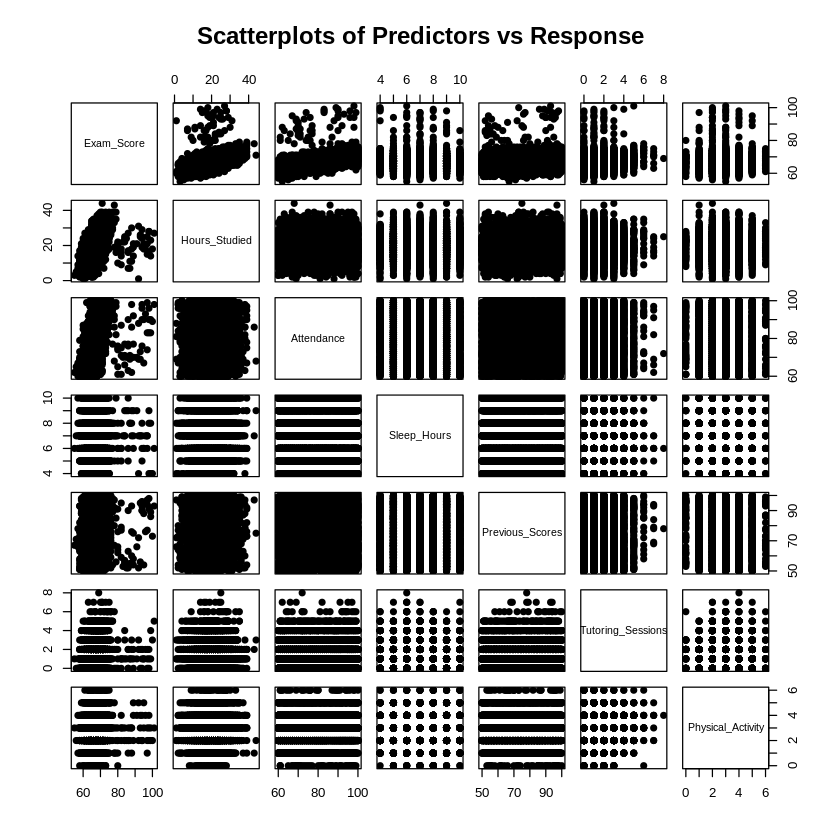

In [11]:
# Scatterplots of quantitative predictors vs response variable (Exam_Score) to check linearity

pairs(~ Exam_Score + Hours_Studied + Attendance + Sleep_Hours + Previous_Scores + Tutoring_Sessions + Physical_Activity, data = df, main = "Scatterplots of Predictors vs Response", pch = 19)

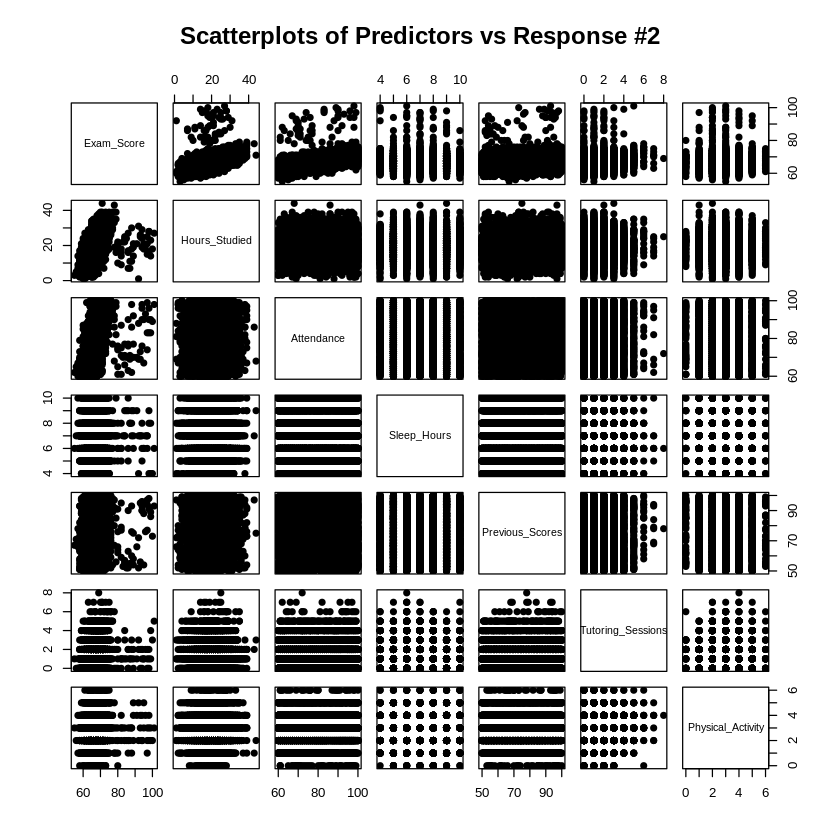

In [12]:
# Sleep_Hours and Exam_Score, as well as Physical_Activity and Exam_Score, do not exhibit clear linearity as seen in the previous plot

# Applying the square root transformation to Sleep_Hours and Physical_Activity
df$Sqrt_Sleep_Hours = sqrt(df$Sleep_Hours)
df$Sqrt_Physical_Activity = sqrt(df$Physical_Activity)

pairs(~ Exam_Score + Hours_Studied + Attendance + Sleep_Hours + Previous_Scores + Tutoring_Sessions + Physical_Activity, data = df, main = "Scatterplots of Predictors vs Response #2", pch = 19)

In [ ]:
# @title 2. Checking Independence of Observations


In [13]:
dwtest(lm(Exam_Score ~ 1, data = df))


	Durbin-Watson test

data:  lm(Exam_Score ~ 1, data = df)
DW = 1.9718, p-value = 0.1255
alternative hypothesis: true autocorrelation is greater than 0


In [ ]:
# @title 3. Checking Homoscedasticity


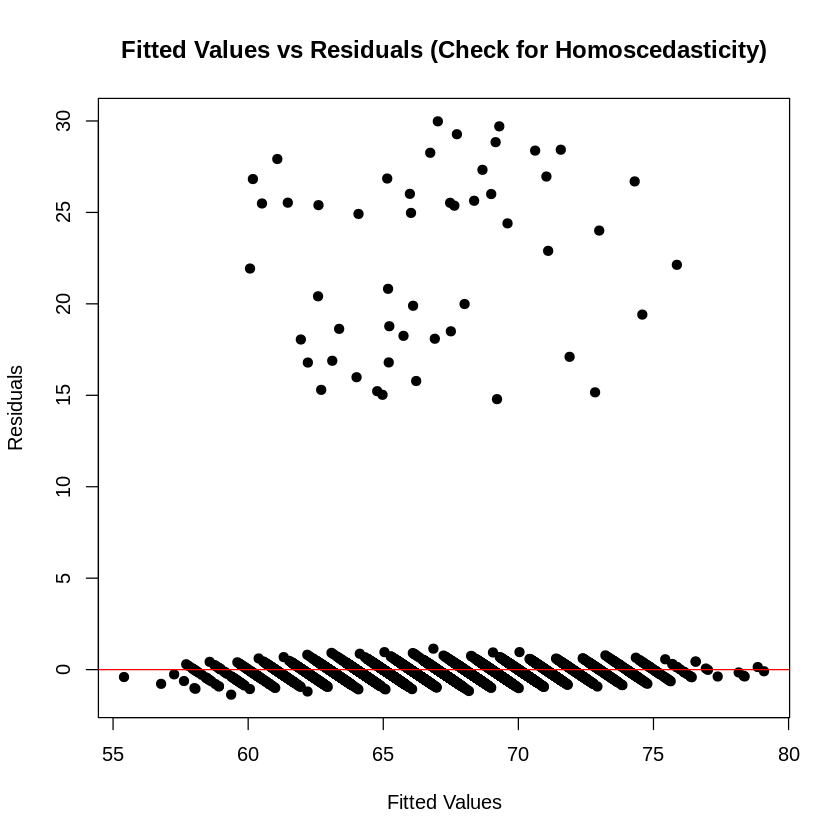

In [14]:
# Plot Fitted Values vs Residuals

plot(reg$fitted.values, residuals(reg), pch = 19, xlab = "Fitted Values", ylab = "Residuals", main = "Fitted Values vs Residuals (Check for Homoscedasticity)")

abline(h = 0, col = "red")

In [ ]:
# @title 4. Checking Normality of Response (Dependent) Variable

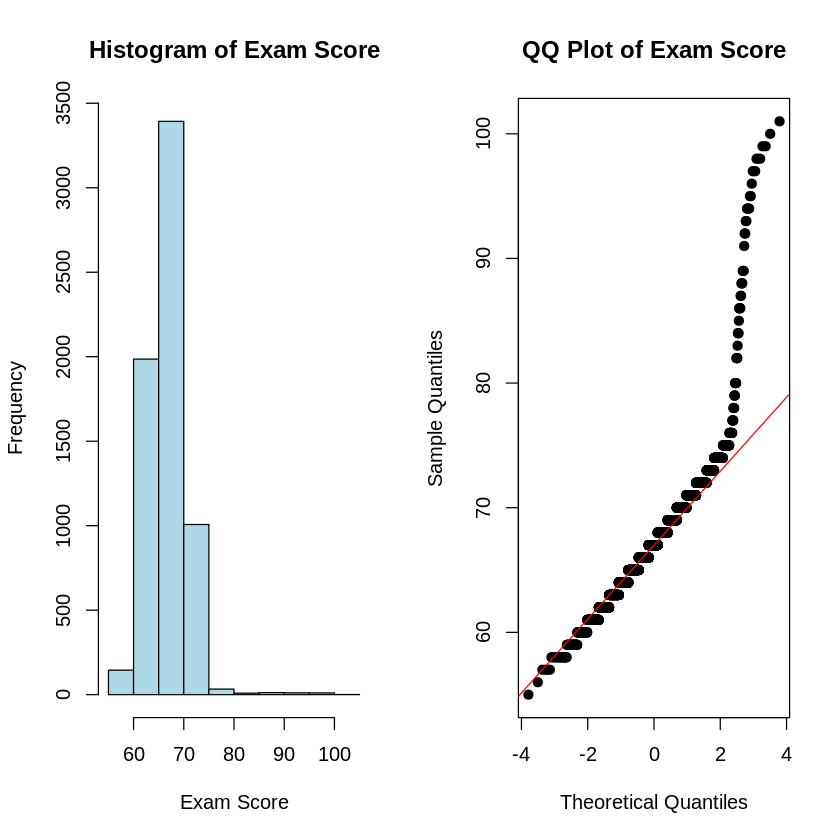

In [15]:
# Normality of the response variable (Exam Score)
op = par(mfrow = c(1, 2))

hist(df$Exam_Score, main = "Histogram of Exam Score", xlab = "Exam Score", breaks = 10, col = "light blue", border = "black")

qqnorm(df$Exam_Score, main = "QQ Plot of Exam Score", pch = 19)
qqline(df$Exam_Score, col = "red")

par(op)

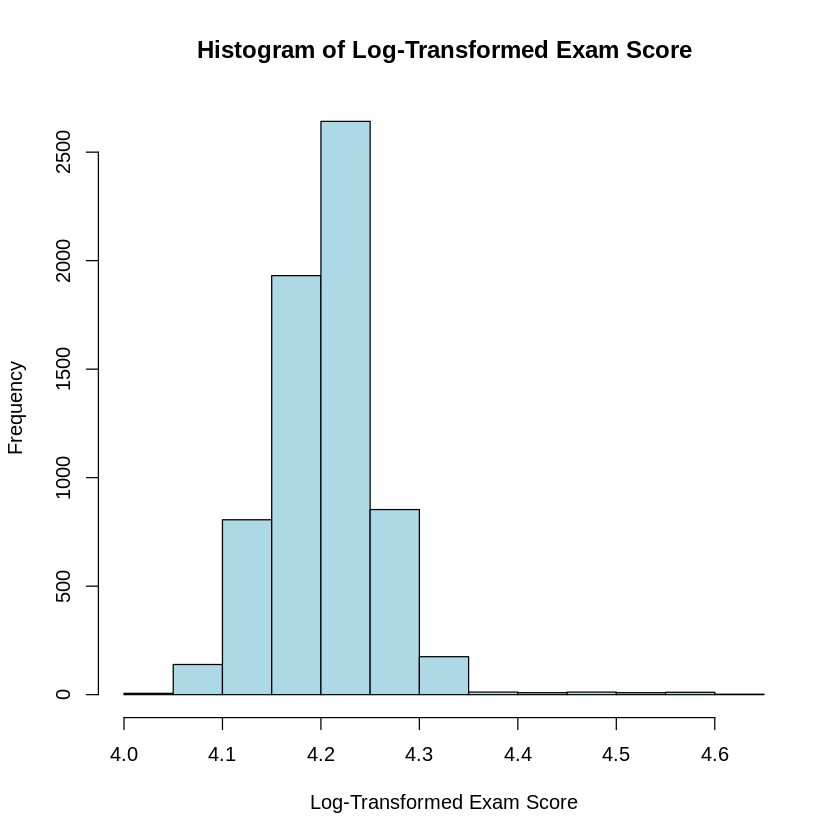

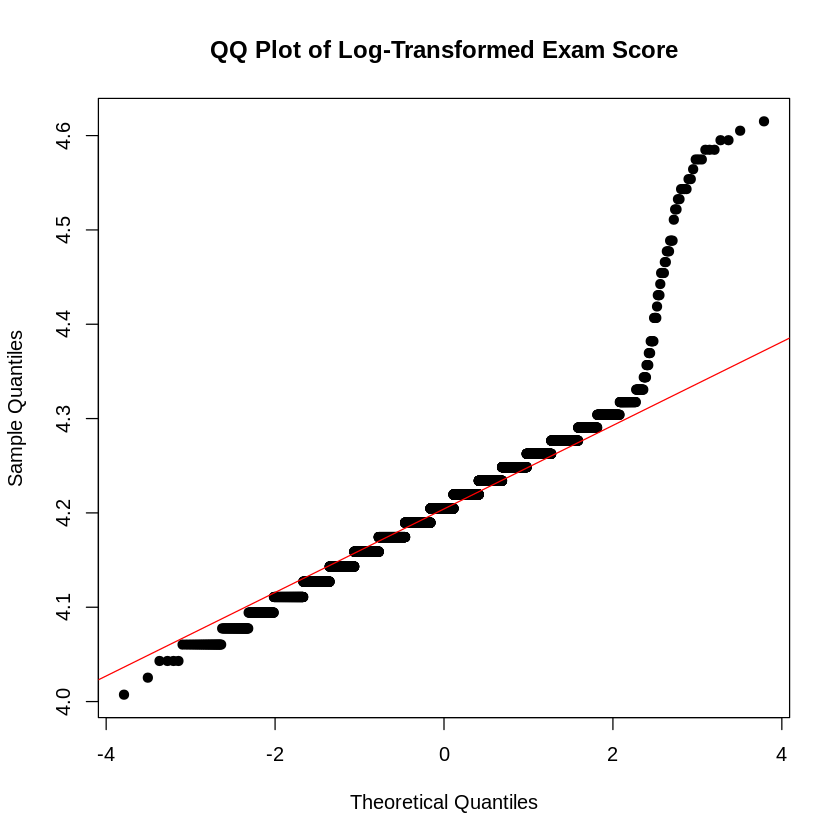

In [16]:
# Applying the log-transformation to the response variable, Exam_Score
df$log_Exam_Score = log(df$Exam_Score)

# output is the same even if we were to say Sqrt_Sleep_Hours and Sqrt_Physical_Activity
model_log = lm(log_Exam_Score ~ Hours_Studied + Attendance + Previous_Scores + Tutoring_Sessions + Sleep_Hours + Physical_Activity, data = df)

hist(df$log_Exam_Score, main = "Histogram of Log-Transformed Exam Score", xlab = "Log-Transformed Exam Score", breaks = 10, col = "light blue", border = "black")

qqnorm(df$log_Exam_Score, main = "QQ Plot of Log-Transformed Exam Score", pch = 19)
qqline(df$log_Exam_Score, col = "red")

In [ ]:
# @title 5. Checking No Multicollinearity


In [17]:
# Correlation matrix for quantitative/numeric predictors

correlation_matrix = cor(df[, c("Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity")])
print(correlation_matrix)

                  Hours_Studied   Attendance   Sleep_Hours Previous_Scores
Hours_Studied       1.000000000 -0.009907859  0.0109766893      0.02484578
Attendance         -0.009907859  1.000000000 -0.0159178258     -0.02018610
Sleep_Hours         0.010976689 -0.015917826  1.0000000000     -0.02175034
Previous_Scores     0.024845782 -0.020186103 -0.0217503431      1.00000000
Tutoring_Sessions  -0.014282264  0.014323509 -0.0122161120     -0.01312233
Physical_Activity   0.004624390 -0.022434703 -0.0003780652     -0.01127373
                  Tutoring_Sessions Physical_Activity
Hours_Studied           -0.01428226      0.0046243903
Attendance               0.01432351     -0.0224347027
Sleep_Hours             -0.01221611     -0.0003780652
Previous_Scores         -0.01312233     -0.0112737339
Tutoring_Sessions        1.00000000      0.0177329453
Physical_Activity        0.01773295      1.0000000000


In [ ]:
# @title 6. Checking No Autocorrelation of Residuals


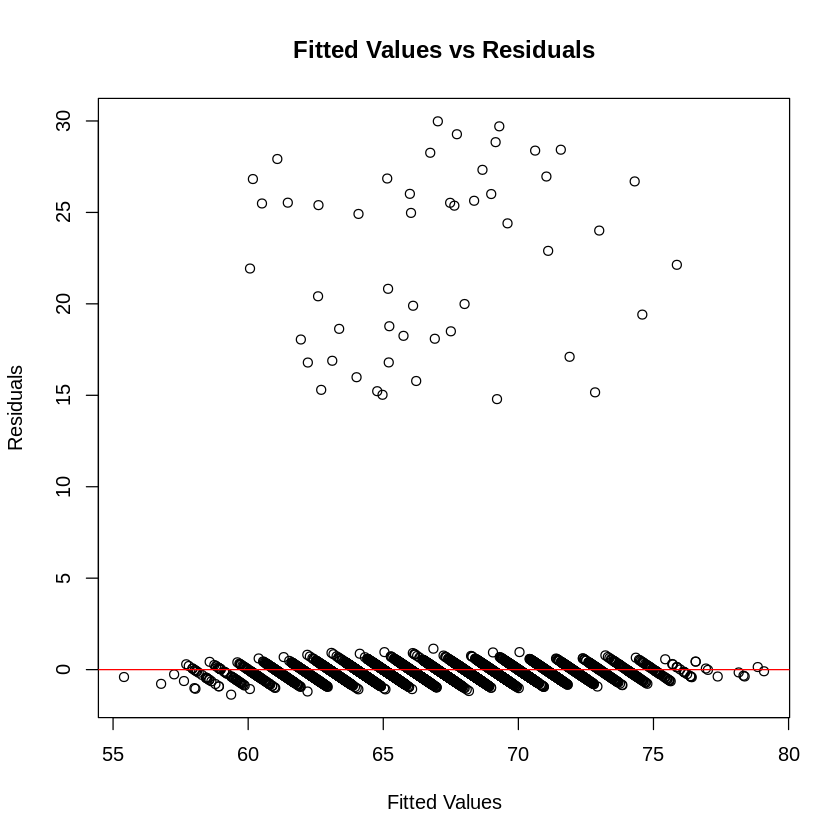

In [18]:
plot(reg$fitted.values, reg$residuals, xlab = "Fitted Values", ylab = "Residuals", main = "Fitted Values vs Residuals")

abline(h = 0, col = "red")

In [ ]:
# @title 7. Checking Outliers & Leverage


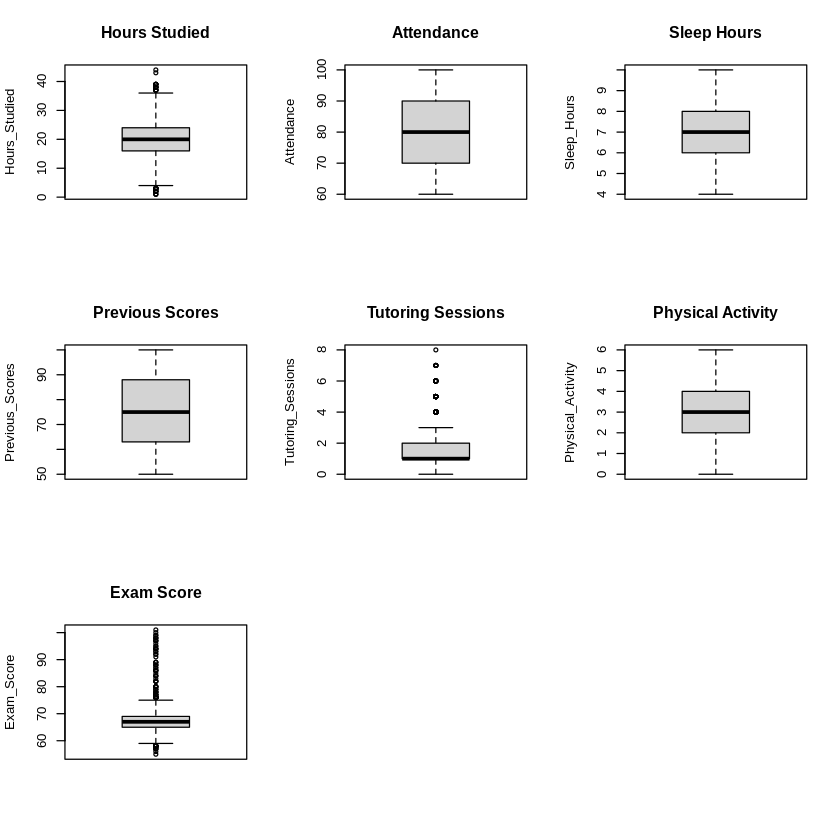

In [19]:
# Boxplots of all numeric variables (for outlier detection)

par(mfrow = c(3, 3))

boxplot(df$Hours_Studied, main = "Hours Studied", ylab = "Hours_Studied")

boxplot(df$Attendance, main = "Attendance", ylab = "Attendance")

boxplot(df$Sleep_Hours, main = "Sleep Hours", ylab = "Sleep_Hours")

boxplot(df$Previous_Scores, main = "Previous Scores", ylab = "Previous_Scores")

boxplot(df$Tutoring_Sessions, main = "Tutoring Sessions", ylab = "Tutoring_Sessions")

boxplot(df$Physical_Activity, main = "Physical Activity", ylab = "Physical_Activity")

boxplot(df$Exam_Score, main = "Exam Score", ylab = "Exam_Score")

par(op)

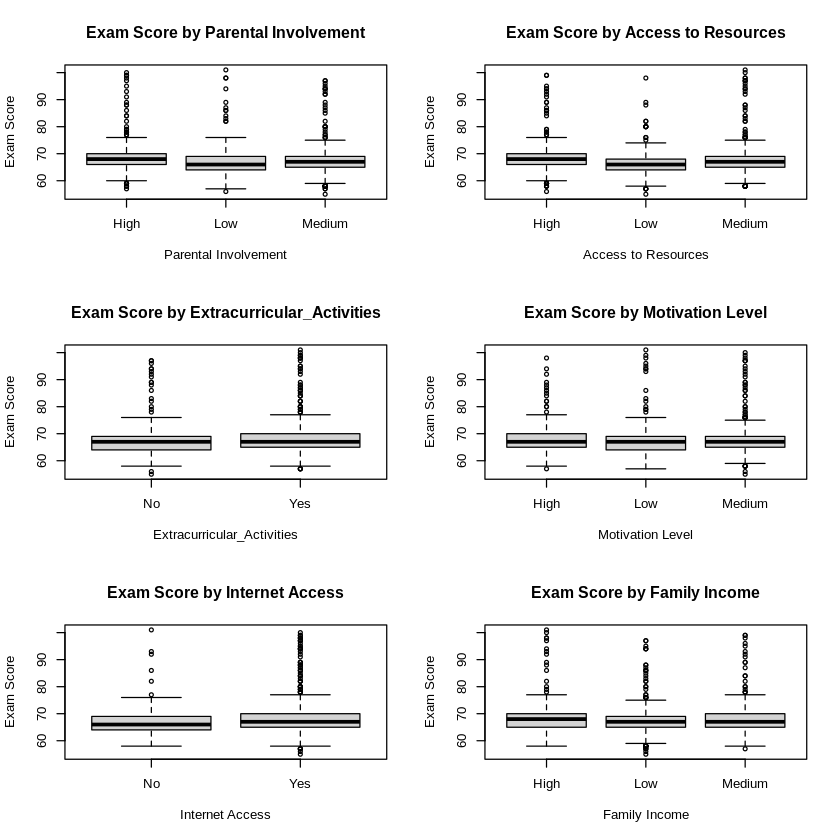

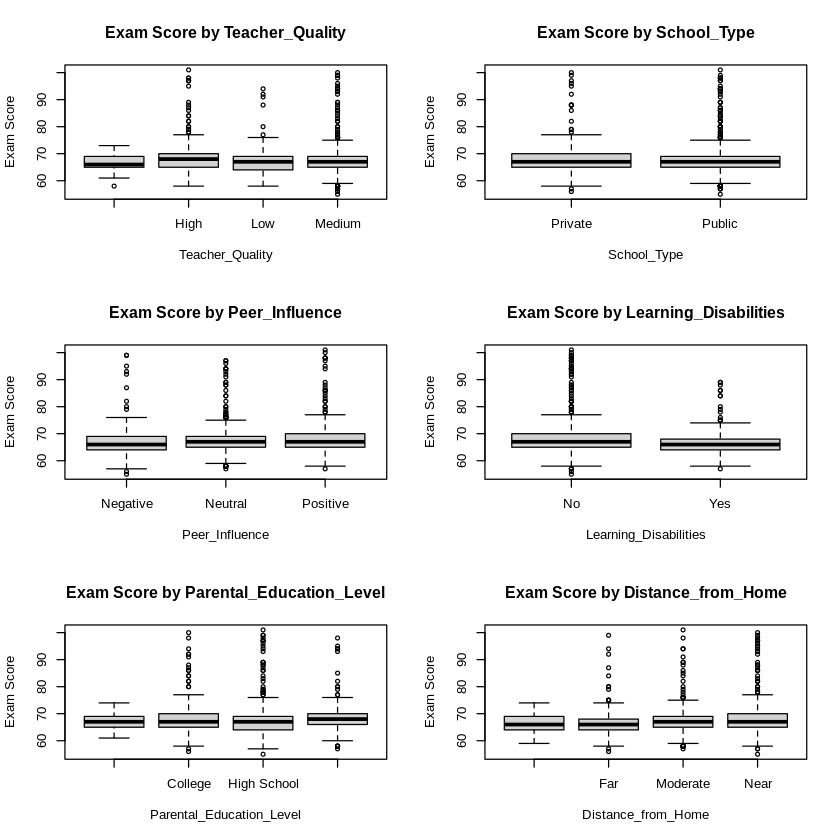

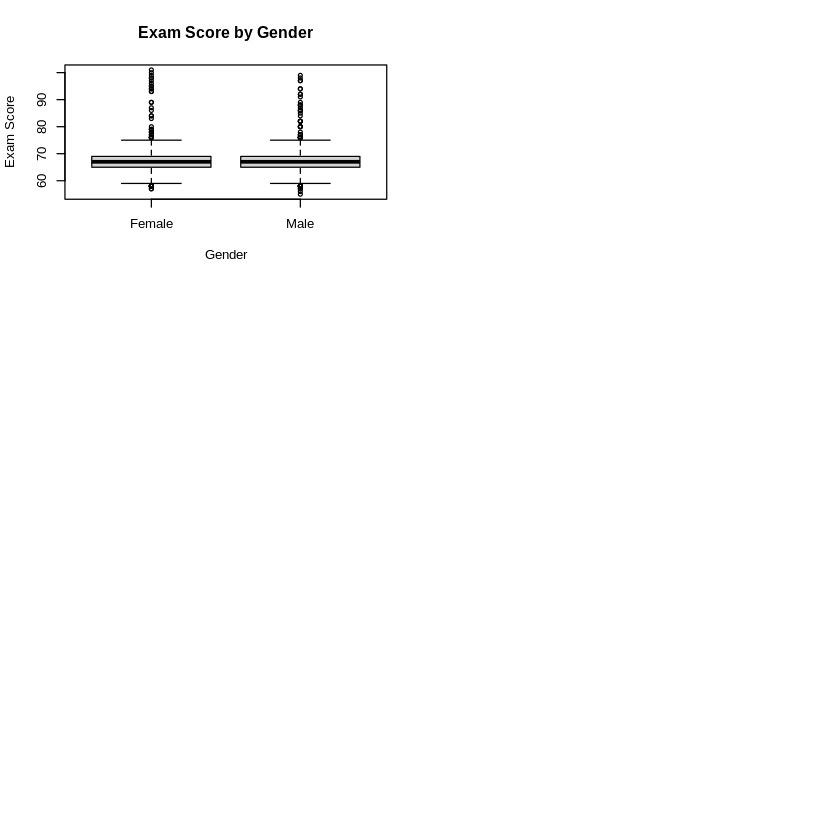

In [20]:
# Boxplots of categorical variables against Exam_Score (continuing the outlier detection)

par(mfrow = c(3, 2))

boxplot(Exam_Score ~ Parental_Involvement, data = df, main = "Exam Score by Parental Involvement", xlab = "Parental Involvement", ylab = "Exam Score")

boxplot(Exam_Score ~ Access_to_Resources, data = df, main = "Exam Score by Access to Resources", xlab = "Access to Resources", ylab = "Exam Score")

boxplot(Exam_Score ~ Extracurricular_Activities, data = df, main = "Exam Score by Extracurricular_Activities", xlab = "Extracurricular_Activities", ylab = "Exam Score")

boxplot(Exam_Score ~ Motivation_Level, data = df, main = "Exam Score by Motivation Level", xlab = "Motivation Level", ylab = "Exam Score")

boxplot(Exam_Score ~ Internet_Access, data = df, main = "Exam Score by Internet Access", xlab = "Internet Access", ylab = "Exam Score")

boxplot(Exam_Score ~ Family_Income, data = df, main = "Exam Score by Family Income", xlab = "Family Income", ylab = "Exam Score")

boxplot(Exam_Score ~ Teacher_Quality, data = df, main = "Exam Score by Teacher_Quality", xlab = "Teacher_Quality", ylab = "Exam Score")

boxplot(Exam_Score ~ School_Type, data = df, main = "Exam Score by School_Type", xlab = "School_Type", ylab = "Exam Score")

boxplot(Exam_Score ~ Peer_Influence, data = df, main = "Exam Score by Peer_Influence", xlab = "Peer_Influence", ylab = "Exam Score")

boxplot(Exam_Score ~ Learning_Disabilities, data = df, main = "Exam Score by Learning_Disabilities", xlab = "Learning_Disabilities", ylab = "Exam Score")

boxplot(Exam_Score ~ Parental_Education_Level, data = df, main = "Exam Score by Parental_Education_Level", xlab = "Parental_Education_Level", ylab = "Exam Score")

boxplot(Exam_Score ~ Distance_from_Home, data = df, main = "Exam Score by Distance_from_Home", xlab = "Distance_from_Home", ylab = "Exam Score")

boxplot(Exam_Score ~ Gender, data = df, main = "Exam Score by Gender", xlab = "Gender", ylab = "Exam Score")

par(op)

In [ ]:
# @title 8. Checking Homoscedasticity (Alternative Check)


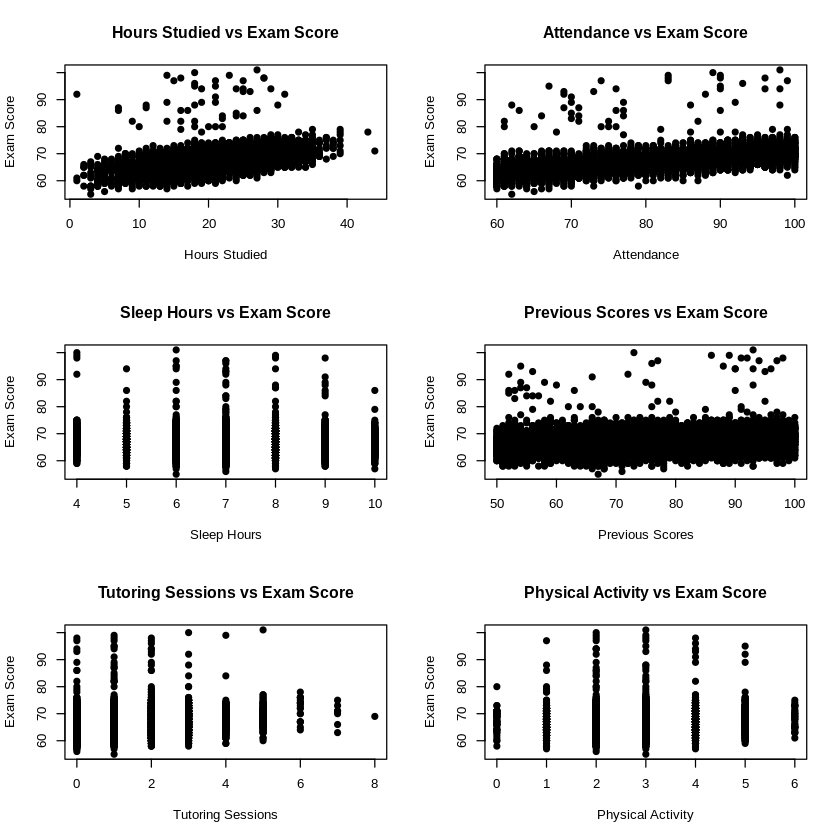

In [21]:
# Scatterplots of each numeric predictor as the x and the response variable as y to check for variance patterns

par(mfrow = c(3, 2))

plot(df$Hours_Studied, df$Exam_Score, pch = 19, xlab = "Hours Studied", ylab = "Exam Score", main = "Hours Studied vs Exam Score")

plot(df$Attendance, df$Exam_Score, pch = 19, xlab = "Attendance", ylab = "Exam Score", main = "Attendance vs Exam Score")

plot(df$Sleep_Hours, df$Exam_Score, pch = 19, xlab = "Sleep Hours", ylab = "Exam Score", main = "Sleep Hours vs Exam Score")

plot(df$Previous_Scores, df$Exam_Score, pch = 19, xlab = "Previous Scores", ylab = "Exam Score", main = "Previous Scores vs Exam Score")

plot(df$Tutoring_Sessions, df$Exam_Score, pch = 19, xlab = "Tutoring Sessions", ylab = "Exam Score", main = "Tutoring Sessions vs Exam Score")

plot(df$Physical_Activity, df$Exam_Score, pch = 19, xlab = "Physical Activity", ylab = "Exam Score", main = "Physical Activity vs Exam Score")

par(op)

In [ ]:
# @title 9. Checking Transformation of Skewness


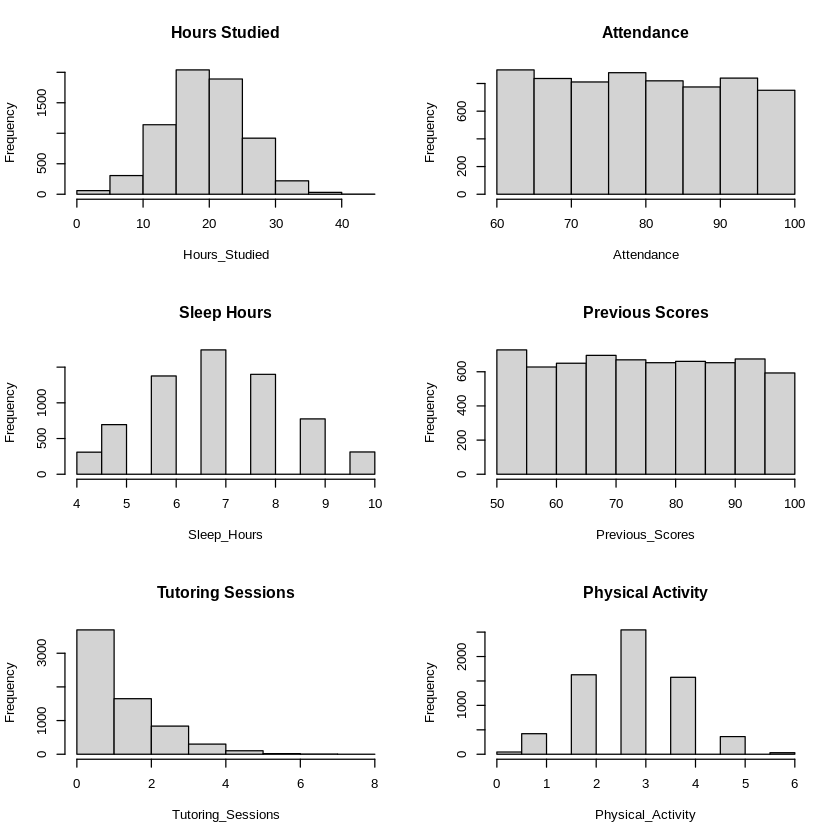

In [22]:
# Histograms for all numeric predictors to check skewness

par(mfrow = c(3, 2))

hist(df$Hours_Studied, main = "Hours Studied", xlab = "Hours_Studied", breaks = 10)

hist(df$Attendance, main = "Attendance", xlab = "Attendance", breaks = 10)

hist(df$Sleep_Hours, main = "Sleep Hours", xlab = "Sleep_Hours", breaks = 10)

hist(df$Previous_Scores, main = "Previous Scores", xlab = "Previous_Scores", breaks = 10)

hist(df$Tutoring_Sessions, main = "Tutoring Sessions", xlab = "Tutoring_Sessions", breaks = 10)

hist(df$Physical_Activity, main = "Physical Activity", xlab = "Physical_Activity", breaks = 10)

par(op)

In [ ]:
# @title 10. Checking Model Fit & Revisions / Transformations


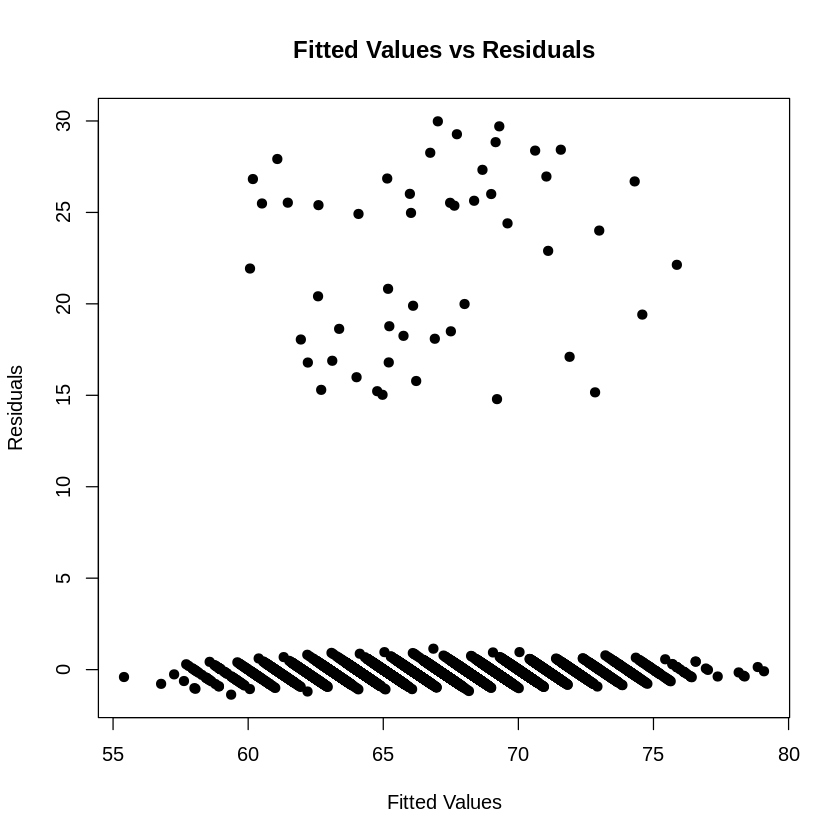

In [23]:
# Plot residuals vs fitted values for model diagnostics

plot(reg$fitted.values, residuals(reg), pch = 19, xlab = "Fitted Values", ylab = "Residuals", main = "Fitted Values vs Residuals")

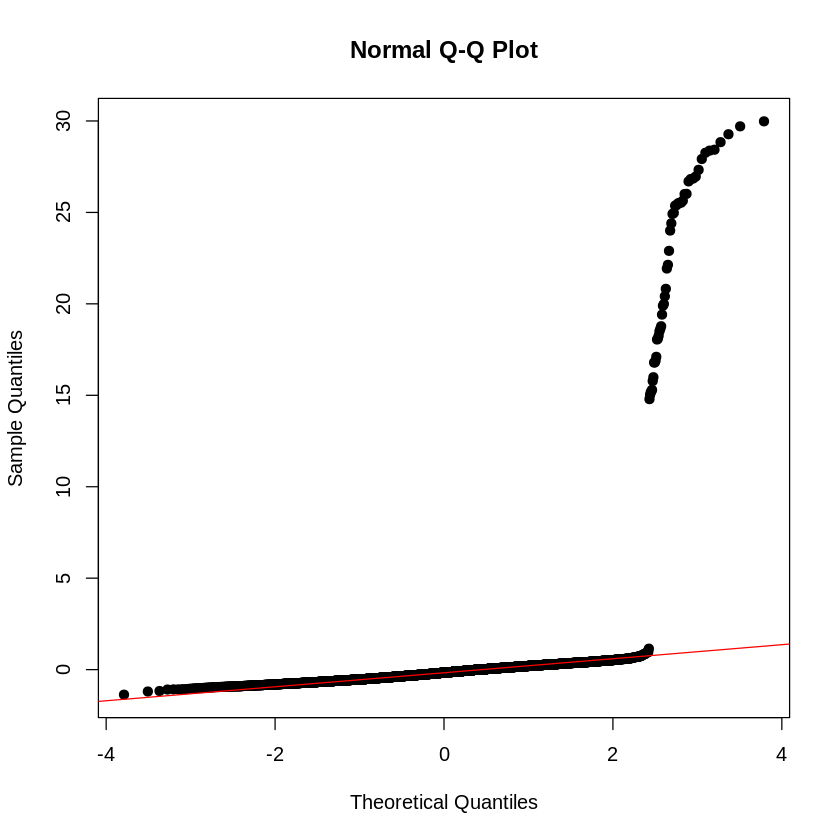

In [24]:
# Normal Q-Q Plot for Residuals

qqnorm(residuals(reg), pch = 19, main = "Normal Q-Q Plot")
qqline(residuals(reg), col = "red")

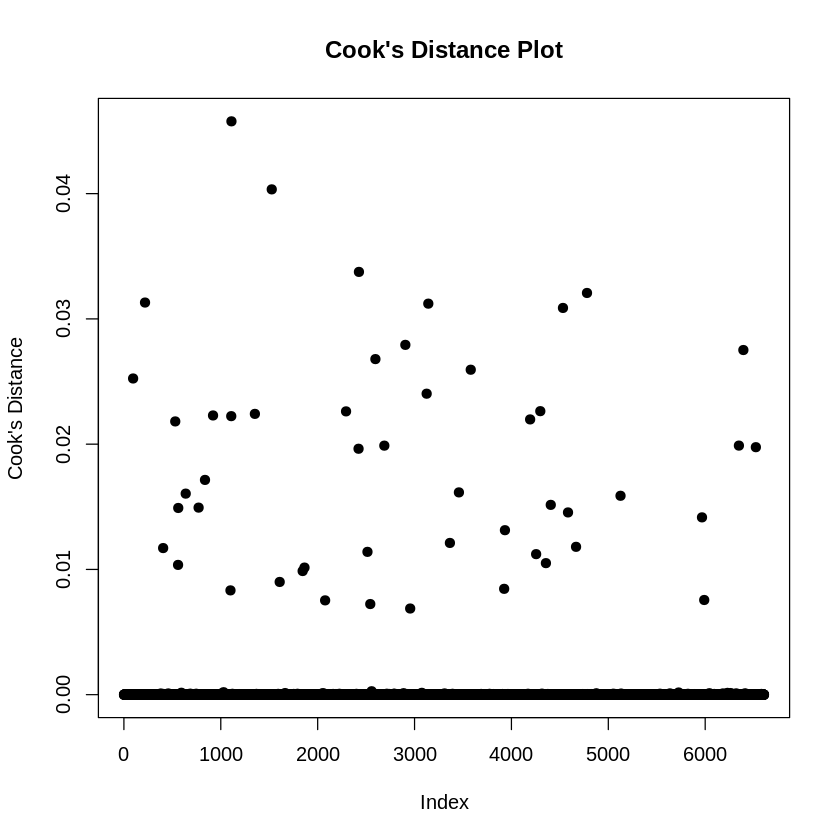

In [25]:
# Cook's Distance Plot

plot(cooks.distance(reg), pch = 19, xlab = "Index", ylab = "Cook's Distance", main = "Cook's Distance Plot")

In [ ]:
# @title # Graphs Before Fitting a Model to the Data:

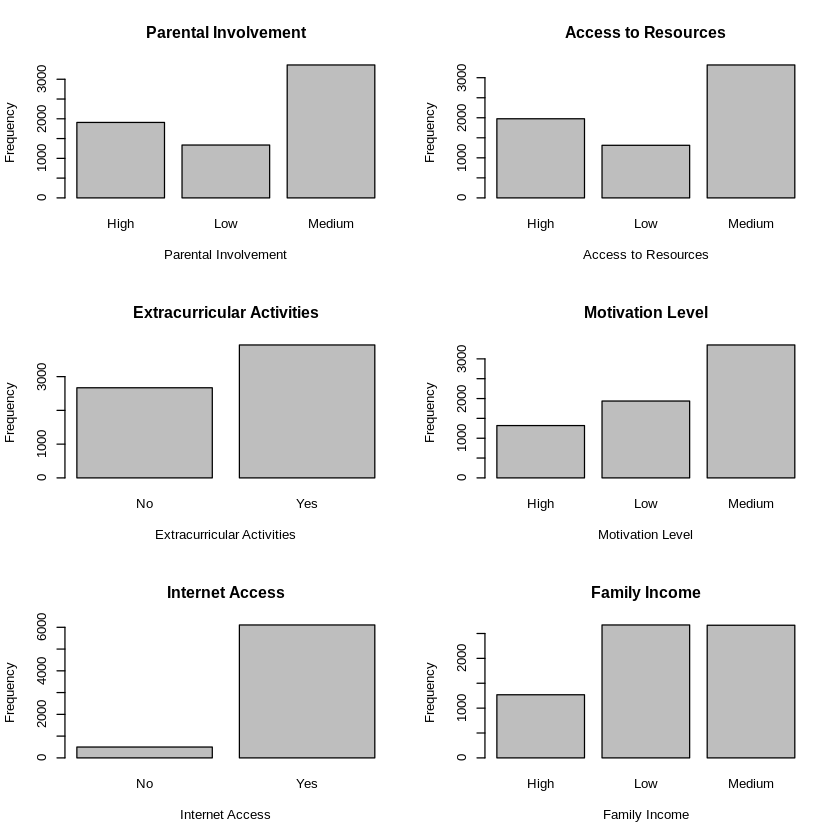

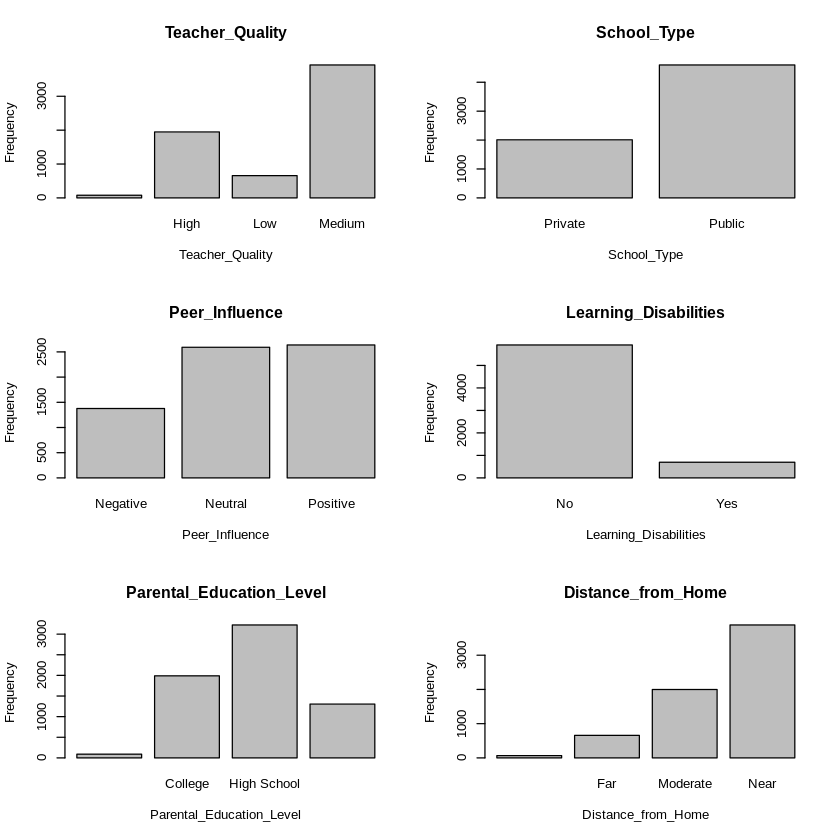

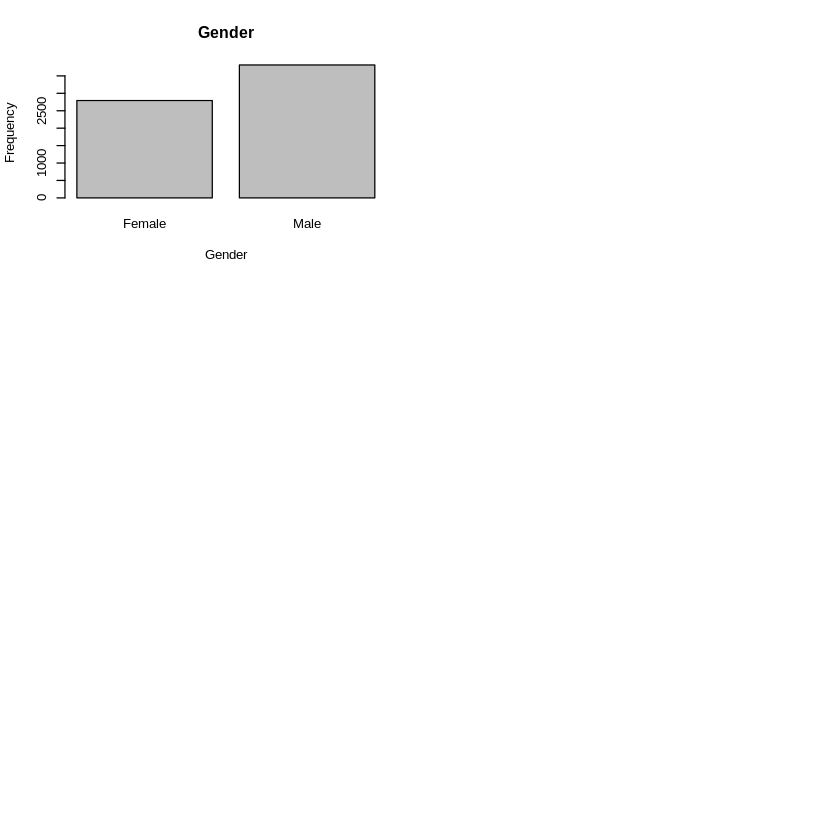

In [51]:
# Adjusted Code for the Categorical Variables:

par(mfrow = c(3, 2))

barplot(table(df$Parental_Involvement), main = "Parental Involvement", xlab = "Parental Involvement", ylab = "Frequency")

barplot(table(df$Access_to_Resources), main = "Access to Resources", xlab = "Access to Resources", ylab = "Frequency")

barplot(table(df$Extracurricular_Activities), main = "Extracurricular Activities", xlab = "Extracurricular Activities", ylab = "Frequency")

barplot(table(df$Motivation_Level), main = "Motivation Level", xlab = "Motivation Level", ylab = "Frequency")

barplot(table(df$Internet_Access), main = "Internet Access", xlab = "Internet Access", ylab = "Frequency")

barplot(table(df$Family_Income), main = "Family Income", xlab = "Family Income", ylab = "Frequency")

barplot(table(df$Teacher_Quality), main = "Teacher_Quality", xlab = "Teacher_Quality", ylab = "Frequency")

barplot(table(df$School_Type), main = "School_Type", xlab = "School_Type", ylab = "Frequency")

barplot(table(df$Peer_Influence), main = "Peer_Influence", xlab = "Peer_Influence", ylab = "Frequency")

barplot(table(df$Learning_Disabilities), main = "Learning_Disabilities", xlab = "Learning_Disabilities", ylab = "Frequency")

barplot(table(df$Parental_Education_Level), main = "Parental_Education_Level", xlab = "Parental_Education_Level", ylab = "Frequency")

barplot(table(df$Distance_from_Home), main = "Distance_from_Home", xlab = "Distance_from_Home", ylab = "Frequency")

barplot(table(df$Gender), main = "Gender", xlab = "Gender", ylab = "Frequency")

par(op)

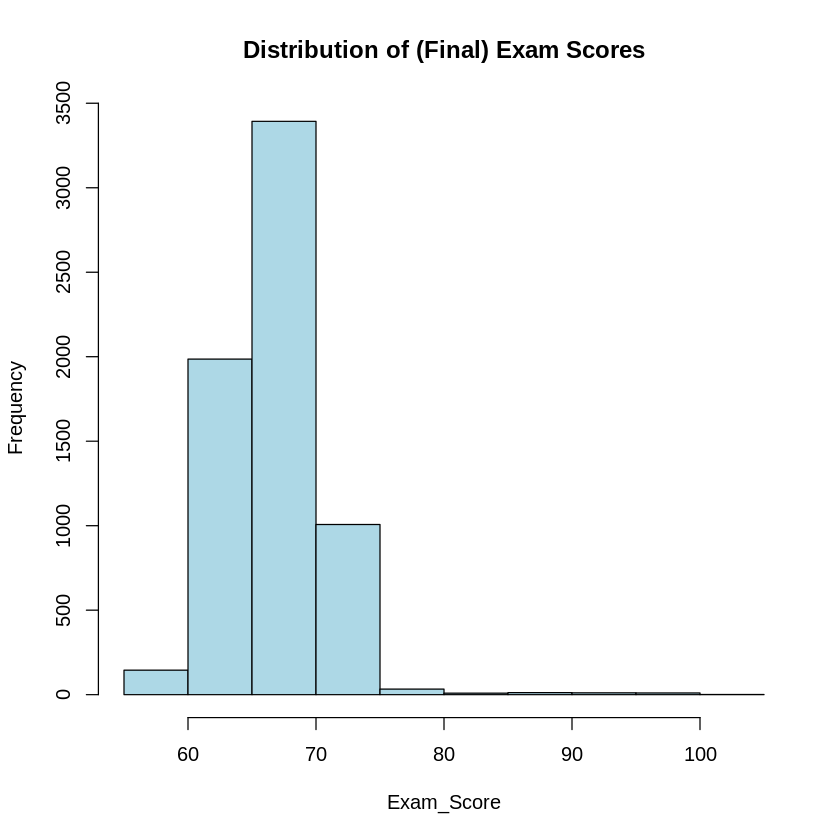

In [28]:
# Distribution of the Response Variable, which is Exam_Score
# Histogram is a satisfactory choice since df has well over 150 observations

hist(df$Exam_Score, main = "Distribution of (Final) Exam Scores", xlab = "Exam_Score", col = "light blue", border = "black")

In [ ]:
# @title # Initial Model Fit to the Data (Before Any Transformation If Needed):


In [29]:
# Converting the categorical variables to factors using the as.factor function

df$Parental_Involvement = as.factor(df$Parental_Involvement)

df$Access_to_Resources = as.factor(df$Access_to_Resources)

df$Extracirricular_Activities = as.factor(df$Extracurricular_Activities)

df$Motivation_Level = as.factor(df$Motivation_Level)

df$Internet_Access = as.factor(df$Internet_Access)

df$Family_Income = as.factor(df$Family_Income)

df$Teacher_Quality = as.factor(df$Teacher_Quality)

df$School_Type = as.factor(df$School_Type)

df$Peer_Influence = as.factor(df$Peer_Influence)

df$Learning_Disabilities = as.factor(df$Learning_Disabilities)

df$Parental_Education_Level = as.factor(df$Parental_Education_Level)

df$Distance_from_Home = as.factor(df$Distance_from_Home)

df$Gender = as.factor(df$Gender)

# Initial model fit to the data (full list of predictors)
initial_reg_model = lm(Exam_Score ~ Hours_Studied + Attendance + Sleep_Hours +
                       Previous_Scores + Tutoring_Sessions + Physical_Activity +
                       Parental_Involvement + Access_to_Resources + Extracurricular_Activities +
                       Motivation_Level + Internet_Access + Family_Income + Teacher_Quality +
                       School_Type + Peer_Influence + Learning_Disabilities +
                       Parental_Education_Level + Distance_from_Home + Gender,
                       data = df)

summary(initial_reg_model)


Call:
lm(formula = Exam_Score ~ Hours_Studied + Attendance + Sleep_Hours + 
    Previous_Scores + Tutoring_Sessions + Physical_Activity + 
    Parental_Involvement + Access_to_Resources + Extracurricular_Activities + 
    Motivation_Level + Internet_Access + Family_Income + Teacher_Quality + 
    School_Type + Peer_Influence + Learning_Disabilities + Parental_Education_Level + 
    Distance_from_Home + Gender, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3699 -0.4280 -0.1686  0.0892 29.9805 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          41.379737   0.497789  83.127  < 2e-16 ***
Hours_Studied                         0.294834   0.004188  70.400  < 2e-16 ***
Attendance                            0.198753   0.002176  91.357  < 2e-16 ***
Sleep_Hours                          -0.001390   0.017090  -0.081 0.935188    
Previous_Scores                       0.048853   0.001745  27.998  < 2

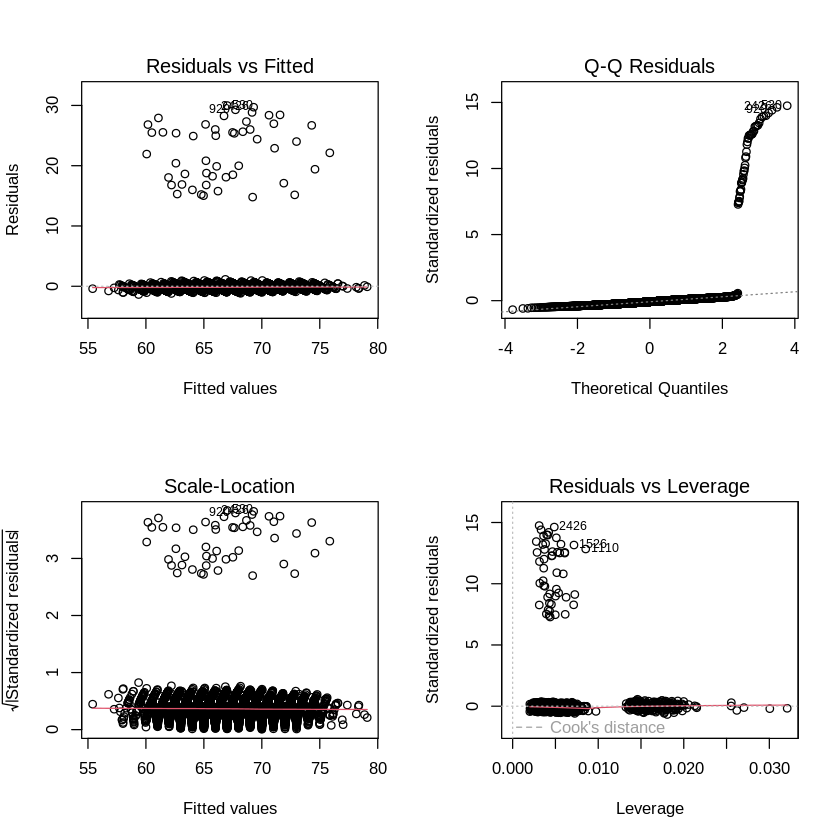

In [30]:
# Residual plots as they can help with checking linearity and homoscedasticity

par(mfrow = c(2, 2))
plot(initial_reg_model)

In [ ]:
# @title # More Transformation of Variables (If Needed):

In [31]:
quantitative_variables = c("Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity")

# Calculating the skewness for each of the quantitative variables
list_of_skewness_values = sapply(df[quantitative_variables], skewness)

print(list_of_skewness_values)

cat("\n")

highly_skewed_greater_than_1 = names(list_of_skewness_values[abs(list_of_skewness_values) > 1])
print(paste("Quantitative Variables With Skewness > 1: ", paste(highly_skewed_greater_than_1, collapse = ", ")))

highly_skewed_less_than_negative_1 = names(list_of_skewness_values[abs(list_of_skewness_values) < -1])
print(paste("Quantitative Variables With Skewness < -1: ", paste(highly_skewed_less_than_negative_1, collapse = ", ")))

    Hours_Studied        Attendance       Sleep_Hours   Previous_Scores 
      0.013492780       0.013659655      -0.023794629      -0.003734837 
Tutoring_Sessions Physical_Activity 
      0.815159338      -0.031350472 

[1] "Quantitative Variables With Skewness > 1:  "
[1] "Quantitative Variables With Skewness < -1:  "


In [ ]:
# @title # Identification of Outliers, Leverage Points, & Influential Observations

In [32]:
# 1. Identifying Outliers:

standardized_residuals = rstandard(reg)
list_of_outliers = which(abs(standardized_residuals) > 3)

print("Outliers (Those With |Standardized Residual| > 3):")
print(list_of_outliers)

[1] "Outliers (Those With |Standardized Residual| > 3):"
  95  218  405  530  559  561  638  771  837  920 1100 1108 1110 1352 1526 1608 
  95  218  405  530  559  561  638  771  837  920 1100 1108 1110 1352 1526 1608 
1845 1864 2077 2293 2422 2426 2514 2543 2596 2688 2905 2955 3125 3142 3365 3458 
1845 1864 2077 2293 2422 2426 2514 2543 2596 2688 2905 2955 3125 3142 3365 3458 
3580 3925 3933 4193 4255 4298 4356 4406 4532 4584 4667 4780 5126 5967 5990 6348 
3580 3925 3933 4193 4255 4298 4356 4406 4532 4584 4667 4780 5126 5967 5990 6348 
6394 6523 
6394 6523 


In [33]:
# 2. Leverage Points:

leverage_value = hatvalues(initial_reg_model)
list_of_high_leverage = which(leverage_value > (2 * mean(leverage_value)))

print("High Leverage Points: ")
print(list_of_high_leverage)

[1] "High Leverage Points: "
  34  128  241  276  317  360  381  397  403  409  418  452  458  471  571  590 
  34  128  241  276  317  360  381  397  403  409  418  452  458  471  571  590 
 593  594  612  619  625  671  684  685  705  724  745  746  785  789  807  868 
 593  594  612  619  625  671  684  685  705  724  745  746  785  789  807  868 
 880  892  940  961 1003 1015 1020 1029 1049 1053 1063 1086 1120 1150 1189 1254 
 880  892  940  961 1003 1015 1020 1029 1049 1053 1063 1086 1120 1150 1189 1254 
1261 1281 1331 1368 1394 1400 1451 1478 1488 1514 1516 1592 1664 1741 1745 1753 
1261 1281 1331 1368 1394 1400 1451 1478 1488 1514 1516 1592 1664 1741 1745 1753 
1765 1792 1798 1886 1947 1972 2048 2059 2110 2117 2159 2164 2189 2205 2224 2225 
1765 1792 1798 1886 1947 1972 2048 2059 2110 2117 2159 2164 2189 2205 2224 2225 
2354 2355 2381 2391 2400 2457 2481 2502 2524 2557 2558 2565 2714 2740 2765 2786 
2354 2355 2381 2391 2400 2457 2481 2502 2524 2557 2558 2565 2714 2740 2765 2786 

In [34]:
# 3. Influential Observations:

cooksDistance_value = cooks.distance(reg)
list_of_influential_observations = which(cooksDistance_value > (4 / nrow(df)))

print("Influential Points (Those With A Cook's Distance > 4/n)")

print(list_of_influential_observations)

[1] "Influential Points (Those With A Cook's Distance > 4/n)"
  95  218  405  530  559  561  638  771  837  920 1100 1108 1110 1352 1526 1608 
  95  218  405  530  559  561  638  771  837  920 1100 1108 1110 1352 1526 1608 
1845 1864 2077 2293 2422 2426 2514 2543 2596 2688 2905 2955 3125 3142 3365 3458 
1845 1864 2077 2293 2422 2426 2514 2543 2596 2688 2905 2955 3125 3142 3365 3458 
3580 3925 3933 4193 4255 4298 4356 4406 4532 4584 4667 4780 5126 5967 5990 6348 
3580 3925 3933 4193 4255 4298 4356 4406 4532 4584 4667 4780 5126 5967 5990 6348 
6394 6523 
6394 6523 


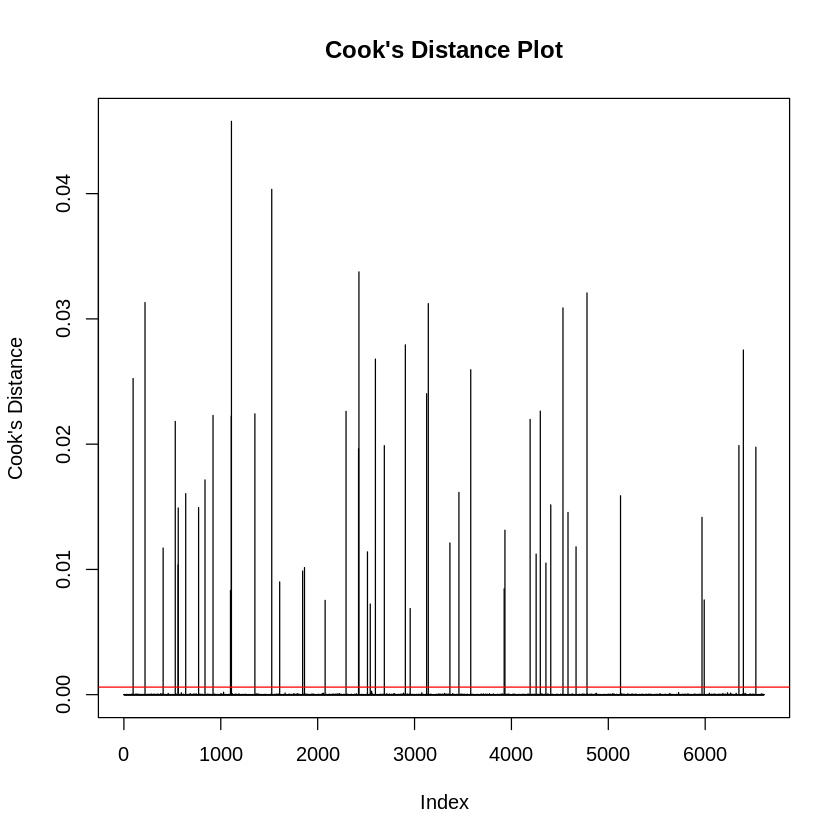

In [35]:
plot(cooksDistance_value, type = "h", main = "Cook's Distance Plot", ylab = "Cook's Distance")
abline(h = 4 / nrow(df), col = "red")

In [ ]:
# @title # Graphs After Fitting the Model to the Data & Removing Outliers:


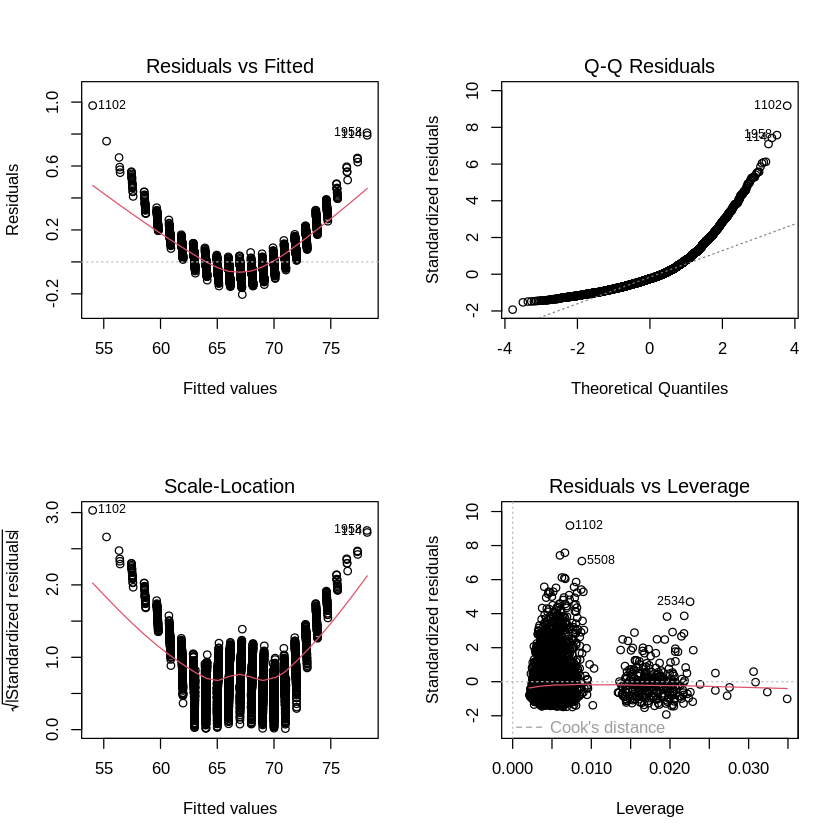

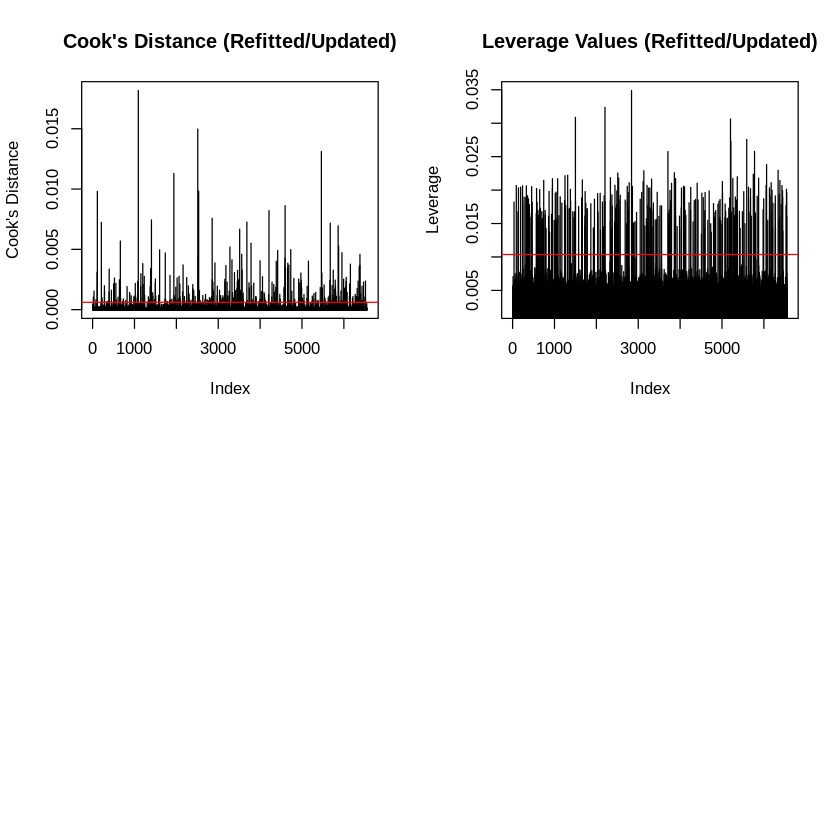

In [52]:
# Removing the highly influential points from df
df_cleaned = df[-list_of_influential_observations, ]

reg_updated = lm(Exam_Score ~ ., data = df_cleaned)

par(mfrow = c(2, 2))
plot(reg_updated)

# Updating the Cook's Distance and Leverage Values
cooksDistance_updated = cooks.distance(reg_updated)
leverage_updated = hatvalues(reg_updated)

plot(cooksDistance_updated, type = "h", main = "Cook's Distance (Refitted/Updated)", ylab = "Cook's Distance")
abline(h = 4 / nrow(df_cleaned), col = "red")

plot(leverage_updated, type = "h", main = "Leverage Values (Refitted/Updated)", ylab = "Leverage")
abline(h = 2 * mean(leverage_updated), col = "red")

In [ ]:
# @title # Model Criticism & Reformulation:


In [37]:
# Checking the VIF values of all variables as those with a value > 10 must be removed

ols_vif_tol(initial_reg_model)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
Hours_Studied,0.99654994,1.003462
Attendance,0.99388453,1.006153
Sleep_Hours,0.99645866,1.003554
Previous_Scores,0.99357644,1.006465
Tutoring_Sessions,0.99770071,1.002305
Physical_Activity,0.99205424,1.008009
Parental_InvolvementLow,0.73300396,1.364249
Parental_InvolvementMedium,0.73441705,1.361624
Access_to_ResourcesLow,0.74635219,1.339850


In [38]:
# Dropping variables with VIF > 10 and refitting the model
reg_model_vif = lm(Exam_Score ~ . - Teacher_Quality - Parental_Education_Level - Distance_from_Home - Extracurricular_Activities, data = df)

ols_vif_tol(reg_model_vif)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
Hours_Studied,0.524682814,1.905913
Attendance,0.390150080,2.563116
Parental_InvolvementLow,0.644794665,1.550881
Parental_InvolvementMedium,0.694439983,1.440009
Access_to_ResourcesLow,0.653255727,1.530794
Access_to_ResourcesMedium,0.710585071,1.407291
Sleep_Hours,0.004527122,220.890892
Previous_Scores,0.872231149,1.146485
Motivation_LevelLow,0.550573729,1.816287


In [40]:
# If Condition Indices greater than 30, severe collinearity could be an issue which would require PC Regression

df_numeric_vars = df[, sapply(df, is.numeric)]

X = as.matrix(df_numeric_vars[,-1])

R = cor(X)

e = eigen(R)

V = e$vec

lambdaj = e$val

kappaj = sqrt(lambdaj[1] / lambdaj)

cbind(lambdaj, kappaj)

lambdaj,kappaj
2.534014911,1.000000
1.994575850,1.127144
1.975339708,1.132619
1.017322976,1.578248
0.987342828,1.602030
0.461175877,2.344074
0.025420376,9.984208
0.002538098,31.597328
0.002269376,33.415760


In [41]:
C = X %*% V # Principal components

colnames(C) = paste("C", (1:ncol(C)), sep = "")  # Gives names to the columns of W

df1 = data.frame(Exam_Score = df$Exam_Score, C)

reg.pc = lm(Exam_Score ~ C, data = df1)

summary(reg.pc)


Call:
lm(formula = Exam_Score ~ C, data = df1)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.675e-12 -3.400e-15  1.100e-15  5.500e-15  1.089e-13 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  1.902e-13  8.398e-13  2.270e-01    0.821    
CC1          6.041e-01  1.548e-13  3.902e+12   <2e-16 ***
CC2         -5.212e-02  3.301e-14 -1.579e+12   <2e-16 ***
CC3         -2.948e-02  1.019e-14 -2.893e+12   <2e-16 ***
CC4         -1.944e-02  4.660e-15 -4.173e+12   <2e-16 ***
CC5          2.864e-04  1.008e-15  2.841e+11   <2e-16 ***
CC6         -3.794e-01  8.554e-14 -4.436e+12   <2e-16 ***
CC7         -4.142e-03  1.263e-14 -3.280e+11   <2e-16 ***
CC8         -6.944e-01  1.861e-13 -3.730e+12   <2e-16 ***
CC9         -6.984e-02  4.870e-14 -1.434e+12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.246e-14 on 6597 degrees of freedom
Multiple R-squared:      1,	Adjusted R-square

In [42]:
alpha = reg.pc$coef[-1]

beta.pc = V %*% alpha

y.hat.pc = C %*% beta.pc

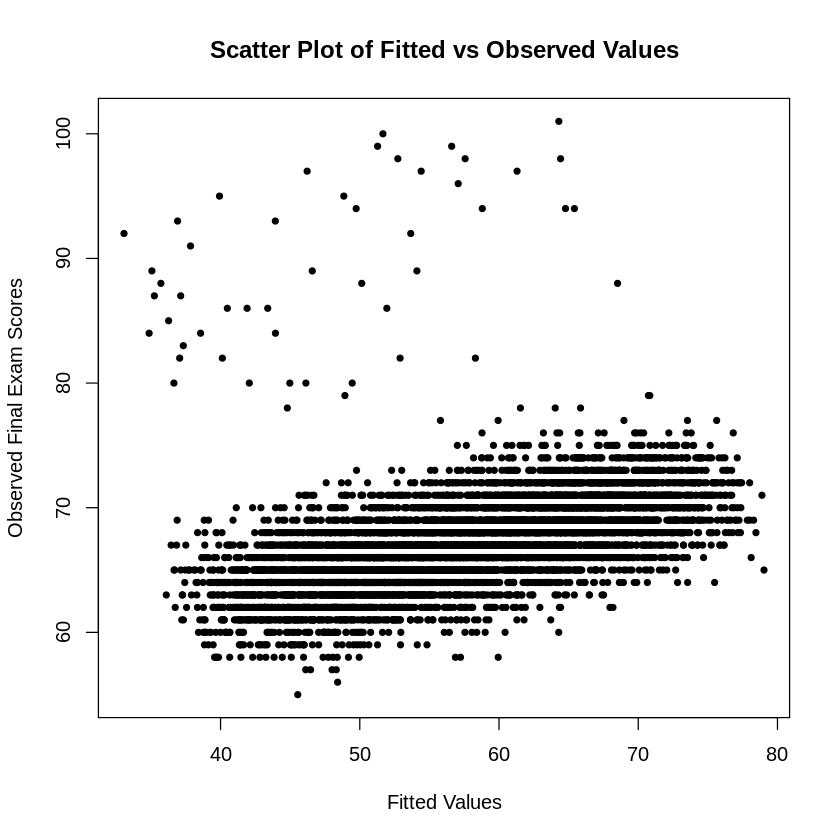

In [43]:
# Plotting the fitted vs. observed values

plot(y.hat.pc, df$Exam_Score, pch = 20, main = "Scatter Plot of Fitted vs Observed Values", xlab = "Fitted Values", ylab = "Observed Final Exam Scores")

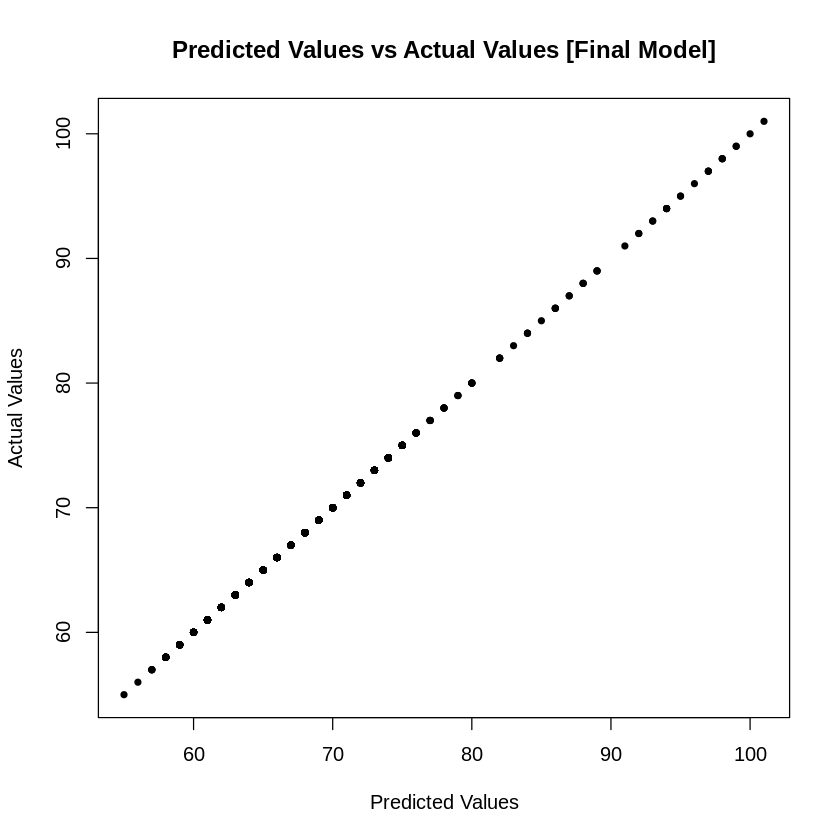

In [48]:
# Predicted values after PC Regression and multi-collinearity issues were dealt with
predicted_values = predict(reg.pc, newdata = df1)

# Plot predicted values vs. actual values (final model)

plot(predicted_values, df1$Exam_Score, pch = 20, main = "Predicted Values vs Actual Values [Final Model]", xlab = "Predicted Values", ylab = "Actual Values")

In [49]:
# Check the correlation between the fitted values and the actual response variable (original)
cor(y.hat.pc, df$Exam_Score)

0.502561


In [50]:
# Check the correlation between the predicted values and the actual response variable (final model)
cor(predicted_values, df1$Exam_Score)

[1] 1